
<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg"/>
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Syrovatskiy Ilya, ODS Slack nickname : bokomaru
    
## <center> Tutorial
    
### <center> "Epidemics on networks with NetworkX and EoN"

With this tutorial, you'll tackle such an established problem in graph theory as **Epidemic dynamics models**.

Firstly we'll have to deal with loading your own data from the **VKontakte network using it's API**, so we will go through some basic principles of requests and authentification. If you don't have account in this network - I'll give you already created graph on my own friends network (308 people), but with changed names and IDs. Probably, someone doesn't want to show his name and ID for OpenDataScience community (: . Also I will provide you the link to the graph based on social net with changed info for every person. Our main instrument for graph modeling will be the **NetworkX library** in Python.

Since we get graph created, we are ready to start with somtething interesting. 
We'll go over the basic building blocks of graphs (nodes, edges, etc) and create **pseudo random graph** with the same depth and quantity of verteces. 

Then we are going to visualize created graphs - there will be some obvious differences between our graphs. 

Next point is to talk about main theme of this tutorial - Epidemic on Network. Thus, you'll know some new stuff about different models of epidemic's distributions.

After you get to know basics it's time to go deeper into epidemic modeling. We'll explore the **most spread models** with code in two graphs (real and pseudo-random), and compare the results with python **library for epidemic modeling EoN** for each case. 

Since we have observed everything I planned in this tutorial, it'll be the time to look at results we got while getting in the world of network, and then - make a conclusion.




Here you can get familiarized with the content more properly:

>> **TABLE OF CONTENTS** :

`0`. **First meeting with graphs and libraries**

    0.1 Intro    
    0.2 Packages installation
    0.3 Packages importing
    
> 
`1.` **Creation of a real Graph** :
    
    1.1 Complex long start:
    
        1.1.1 Fast (no) start with VK API 
        1.1.2 Loading your social net friends
        1.1.3 Forming correct graph
        1.1.4 (optional) Replacing real people's names and ID with random generated

    1.2 Lazy fast start:
        
        1.2.1 Uploading data for building graph
        1.2.2 Building Graph with NetworkX
        1.2.3 Saving created Graph 
        
> 
`2.` **Inspection of the Graph** 

    2.1 Loading graph from source
    
    2.2 Creation of a pseudo-random Graph 

    2.3 Graph Visualization
> 
`3.` **Introduction in Epidemics on Networks**
    
    3.1 Basics of epidemic modeling
    
    3.2 Connected components

> 
`4.` **SI Model** 

    4.1. Statement of the model 
    4.2. Implementation in Real Graph
    4.3. Implementation in Pseudo-random Graph
    4.4. Compare with EoN modeling
    
> 
`5.` **SIR Model** 
    
    5.1. Statement of the model 
    5.2. Implementation in Real Graph
    5.3. Implementation in Pseudo-random Graph
    5.4. Compare with EoN modeling 

> 
`6.` **SIS Model**
   
    6.1. Statement of the model 
    6.2. Implementation in Real Graph
    6.3. Implementation in Pseudo-random Graph
    6.4. Compare with EoN modeling 

> 
`7.` **Conclusion**

> 
 
> 





P.S. materials are based on :
> Courses about networks in HSE(Higher School of Economics National Research University)

> Couple of usefull ideas about EoN I got from the official EoN page https://media.readthedocs.org/pdf/epidemicsonnetworks/latest/epidemicsonnetworks.pdf

> One example for SIR theory taken from :
https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

> One example for SIS theory taken from :
https://chengjunwang.com/post/en/2013-03-14-learn-basic-epidemic-models-with-python/


>>> ## 0. First meeting with graphs and libraries

>> ### 0.1 Intro



    Since we live in the 21th centure, almost all people have accounts in different networks, where they can be closer to their friends wherevere they are. 
    As it plays significant part of our lives, analysis in this sphere is an amazing opportunity to know something interesting about ourselves and our friendship.



The nice thing about graphs is that the concepts and terminology are generally intuitive. Nevertheless, here's some basic lingo:

Graphs are structures that map relations between objects. The objects are referred to as nodes and the connections between them as edges in this tutorial. Note that edges and nodes are commonly referred to by several names that generally mean exactly the same thing:

node == vertex == point
edge == arc == link

    For implement graph in our analysis it's good idea to use some libraries. 

**Firstly**, it's NetworkX library. NetworkX is the most popular Python package for manipulating and analyzing graphs. Several packages offer the same basic level of graph manipulation, but, most likely, NetworkX is the best.

**Secondly**, it's EoN library. EoN (Epidemics on Networks) is a Python module, that provides tools to study the spread of SIS and SIR diseases in networks (SIR and SIS definition I'll provide in the chapter 6). EoN is built on top of NetworkX.

**Thirdly**, since we want to get our friendlist from VK, we have to use their API - that means we need some libraries for requests. If you are not VK user, you can change a bit code in this notebook to get your friends, for example, from Facebook. I am sure, that is pretty the same.

**Finally**, we will need usual basic libraries you already know (I hope) such as matplotlib, Garbage Collector interface, pandas, etc. 


> Let's start from installing NetworkX and EoN and importing everything we will need : 



>> ###  0.2 Packages installation

In [10]:
! pip install networkx
! pip install EoN

# for python3 use: python3 -m pip 
# instead of pip

>> ###  0.3 Packages importing

Now import all libraries that we will use in this tutorial:

In [2]:
# System
import os
import sys
import time
import tqdm
import gc


# Basics 
import pandas as pd
import random
import numpy as np
import copy


# Graph analysis
import networkx as nx
import EoN


# Usefull modules/functions
import scipy as sp
from numpy.linalg import eig
from scipy.integrate import odeint


# Get friends from network 
import requests
import json


# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline



>>> ## 1. Creation of a real Graph 

>> ### 1.1 Complex start

If you are NOT VK user, you can skip this part and jump to loading already created data for graph (**Lazy fast start**). But probably, you can get some new really interesing information in this part for your future researches. There will be not only work with API, but also random generating people with saving their relationships!


>#### 1.1.1 Fast start with VK API


API stands for Application Programming Interface, or an interface for programming applications. In the case of web applications, the API can provide data in a format other than the standard HTML, which makes it convenient to use while writing different applications. Third-party public APIs most often provide data in one of two formats: XML or JSON.

Based on the API: various mobile and desktop clients for Twitter and Vkontakte are built. APIs have high-quality and well documented APIs.

The VKontakte API is described in the https://vk.com/dev documentation and, more specifically, https://vk.com/dev/api_requests.

For example : 
https://api.vk.com/method/getProfiles?uid=59249080. 

We received the answer in json format: (I was authenticated. And yes, it's my ID)

`{"response":[{"uid":59249080,"first_name":"Ilya","last_name":"Syrovatskiy","hidden":1}]}`

Else you got an error also in json: 

`{"error":{"error_code":5,"error_msg":"User authorization failed: no access_token passed.","request_params":[{"key":"oauth","value":"1"},{"key":"method","value":"getProfiles"},{"key":"uid","value":"59249080"}]}}`

In order to use all the features of the VK API, you need to get an access token account. To do this you will need to [create a standalone application](https://vk.com/editapp?act=create).

After we created the application you can find access token in the [Applications](https://vk.com/apps?act=manage) section.

Many VK API methods assume the presence of a private token that must be passed as a parameter when executing the request. The process of obtaining a token is described in the documentation: https://vk.com/dev/access_token

>Attention! Token is called private for a reason. The person possessing it can perform a variety of actions on your behalf. Do not show it to anyone.

In short, you will be given the ID of your application and the list of access rights, that you want to provide to the user of the API. Then you need to specify this data as parameters in the URL of the following format 

https://oauth.vk.com/authorize?client_id={APP_ID}&scope={APP_PERMISSIONS}&response_type=token

, confirm your intention to provide access and copy the current token from the URL in the opened window.

For example: 

In [3]:
# your app ID here : 
APP_ID = 8888888

# your additional permissions:  (here no additional permissions)
PERMISSIONS = ""
AUTH_URL = "https://oauth.vk.com/authorize?client_id={}&scope={}&response_type=token".format(APP_ID, PERMISSIONS)
AUTH_URL

'https://oauth.vk.com/authorize?client_id=8888888&scope=&response_type=token'

Click on this link and you'll get to the page with address : 

https://oauth.vk.com/blank.html#access_token=5614afdcc2bcd42cea3d9c5edc130101dd4be6639b484131870dc12337e5b74b94411de69f0996379dd6b&expires_in=86400&user_id=59249080

where string after access_token= 

>5614afdcc2bcd42cea3d9c5edc130101dd4be6639b484131870dc12337e5b74b94411de69f0996379dd6b 

your access token. 

Let's keep it.

In [4]:
TOKEN = "5614afdcc2bcd42cea3d9c5edc130101dd4be6639b484131870dc12337e5b74b94411de69f0996379dd6b"

**Queryings to VK API**

After receiving a private token, you can safely perform requests to the API using the methods you need (https://vk.com/dev/methods). The request format is as follows: 

https://api.vk.com/method/METHOD_NAME?PARAMETERS&access_token=ACCESS_TOKEN

For example, to get information about a user with id 59249080, you need to run the following query:

In [7]:
# Paste here your user ID :  
uid = 59249080
res = requests.get(
    "https://api.vk.com/method/users.get",
    params={"user_ids": uid,
            "fields": "nickname, screen_name, sex, bdate, city, country, timezone, counters, photo_medium",
            "access_token": TOKEN,
            "version": 5.85}).json()

You can experiment here, just look into API documentation. Requests to API are really usefull: you can build your own web app (using Python and Django), then make correct Auth and connection to API server, and so you will be able to get almost all information you want automatically. For example, you can mining posts, people profiles, etc. with respect to your aims, and then do a research in something amazing in society.

OK, let's continue:

If token is not correct or it is already outdated, you will get an error : 

In [25]:
res

{'error': {'error_code': 5,
  'error_msg': 'User authorization failed: invalid access_token (4).',
  'request_params': [{'key': 'oauth', 'value': '1'},
   {'key': 'method', 'value': 'users.get'},
   {'key': 'version', 'value': '5.85'},
   {'key': 'fields',
    'value': 'nickname, screen_name, sex, bdate, city, country, timezone, counters, photo_medium'},
   {'key': 'user_ids', 'value': '59249080'}]}}

**VK API Restrictions**

There are limited number of requests via VK API - no more than three requests per second. 
>There can be maximum 3 requests to API methods per second from a client. 

>Maximum amount of server requests depends on the app's users amount. 
If an app has less than 10 000 users, 5 requests per second, up to 100 000 – 8 requests, up to 1 000 000 – 20 requests, 1 000 000+ – 35 requests. 

>If one of this limits is exceeded, the server will return the following error: 'Too many requests per second'. 

>If your app's logic implies many requests in a row, check the execute method. 

>Except the frequency limits there are quantitative limits on calling the methods of the same type. By obvious reasons we don't provide the exact limits info. 

>Excess of a quantitative limit access to a particular method will require captcha (see captcha_error). After that it may be temporarily limited (in this case the server doesn't answer on particular method's requests but easily processes any other requests).

You can pause when performing any operation in Python using the sleep function from the time module. To do so you must pass the number of seconds for which the program will be suspended:

In [26]:
for i in range(5):
    time.sleep(.5)
    print(i)

0
1
2
3
4


We already saw that we can get response errors in JSON, so you have to check everything before and after querying to avoid getting false and incorrect information. 

Also, there are many different subtleties of usage API. For example, to get a list of friends of a user, you need to use the friends.get method, which can return both a simple friend list and detailed information about each friend, depending on whether the fields parameter is specified (if not specified, simply returns the ID list). And if the fields parameter is specified, then for one request you cannot get information about more than 5000 people.

Since you've created your APP and got APP ID and token, you are ready to download your friends. 


>#### 1.1.2 Loading your social net friends


Let's define function for it:

In [5]:
def get_friends_ids(user_id, fields = ""):
    res = requests.get(
    "https://api.vk.com/method/friends.get",
    params={"user_id": user_id,
            "fields": fields,
            "access_token": TOKEN,
            "version": 5.85}).json()
    # also you can add access token in the request, receiving it via OAuth 2.0
    if res.get('error'):
        print( res.get('error'))
        return list()
    return res[u'response']

In [9]:
# asking for friends and their gender 
# notice that gender is in the format 1=female, 2=male

# uid supposed to be here your user ID to get YOUR friends
full_friends = get_friends_ids(uid, ["name", "sex"])

>#### 1.1.3 Forming correct graph

After we've downloaded friends, now it's time to download all friends of your friends. 

We will only make our research in graph of your friends only, but for getting correct links between each other we have to load graph of depth 2 (your friends and friends of your friends).

Loading will take some time, something about 10 minutes (depends on total quantity of people, your system and internet connection), so you can make a tea/coffee in this pause :)

In [30]:
full_graph = {}
for i in tqdm.tqdm_notebook(full_friends):
    full_graph[i["user_id"]] = get_friends_ids(i["user_id"])
    time.sleep(.3)

I recommend you to save this data on your local storage to prevent repeating of loading and waiting : 

In [275]:
with open("full_graph_depth2.txt", "w+") as f:
    f.write(json.dumps(full_graph))

with open("full_friends.txt","w+") as f:
    f.write(json.dumps(full_friends))


Now we can continue. The next step is optional, you can just read what is happening there without running a code.

So I will replace real people's names and ID with random generated. 

Here I provide for you links to 2 sets : names and surnames. These sets I will use for random generating people's names on already existing graph(!) - nodes and edges are kept unchanged:

names : 
>go to https://www.ssa.gov/oact/babynames/limits.html
    
    then download National data 
    in ZIP file take yob2017.txt
   
surnames : 
>go to https://github.com/smashew/NameDatabases/blob/master/NamesDatabases/surnames/us.txt
    
    download surnames as us.txt

>
> Or you can load all needed data from my repo: https://github.com/Mercurialll/tutors_and_projs/tree/master/jupyter_english/tutorials


>#### 1.1.4 (optional) Replacing real people's names and ID with random generated

In [10]:
names = pd.read_csv("yob2017.txt", header=None)
names.rename(columns={0: 'name', 1: 'sex', 2: 'Popularity'}, inplace=True)

surnames = pd.read_table("us.txt", header=None)
surnames.rename(columns={0: 'surname'}, inplace=True)


In [11]:
def get_random_people(full_friends, names, surnames):
    n_people = len(full_friends)
    n_m = 0
    n_f = 0
    
    true_id_f = []
    true_id_m = []
    for friend in full_friends:
        if friend['sex'] == 2:
            n_m += 1
            true_id_m.append(friend['uid'])
        else:
            n_f += 1
            true_id_f.append(friend['uid'])
    print("people number: ", n_people, ", men: ", n_m, ", women: ", n_f)

    # take only top popular names for both Female and Male : 
    names_f = names.query('sex == "F"')[:n_f].name.values
    names_m = names.query('sex == "M"')[:n_m].name.values

    # take random n_people surnames : 
    random.seed(17)
    rand_indc = np.random.choice(a=range(len(surnames)), size=n_people, replace=False)
    s_names = surnames.surname.values[rand_indc]
    # separate on female/male
    s_names_f = s_names[:n_f]
    s_names_m = s_names[n_f:]
    
    # we will take from here random IDs of users:
    ids = np.random.choice(a=range(1001, 9999), size=n_people, replace=False)
    # separate on female/male
    id_f = ids[:n_f]
    id_m = ids[n_f:]
    
    random_f = pd.DataFrame(data={'uid': id_f, 'first_name': names_f, 'last_name': s_names_f, 
                                  'true_id': true_id_f, 'user_id': id_f, 'sex': 1})
    random_m = pd.DataFrame(data={'uid': id_m, 'first_name': names_m, 'last_name': s_names_m, 
                                  'true_id': true_id_m, 'user_id': id_m, 'sex': 2})
    
    # merge male and female random sets
    random_people = pd.concat([random_f, random_m])
    
    return(random_people)
    

In [232]:
random_people = get_random_people(full_friends, names, surnames)
random_people.drop(columns=['true_id']).head()

people number:  309 , men:  207 , women:  102


,first_name,last_name,sex,uid,user_id
0,Emma,Plese,1,9412,9412
1,Olivia,Mckellan,1,4503,4503
2,Ava,Abram,1,8623,8623
3,Isabella,Bloomquist,1,5658,5658
4,Sophia,Berkson,1,8033,8033


So here everything is random except of true_id - which is a column of real users IDs (my friends). (I drop it just to show created dataset, but not real IDs).

**Create new friend list according to the true_id column:**



In [313]:
%%time
full_friends_new = []
for person in full_friends:
    #taking new ID from random_people data set according to current user ID: 
    person_dict = {}
    person_data = random_people[random_people['true_id']==person['uid']]

    # keep all parameters from random_people according to current person
    person_dict['first_name'] = person_data.first_name.values[0]
    person_dict['last_name'] = person_data.last_name.values[0]
    # retyping here because of problem with JSON serialization numpy int64
    person_dict['sex'] = int(person_data.sex.values[0])
    person_dict['uid'] = int(person_data.uid.values[0])
    person_dict['user_id'] = int(person_data.user_id.values[0])

    full_friends_new.append(person_dict)


CPU times: user 407 ms, sys: 0 ns, total: 407 ms
Wall time: 406 ms


In [243]:
# just printed first 2 "new" friends: 
full_friends_new[:2]

[{'first_name': 'Emma',
  'last_name': 'Plese',
  'sex': 1,
  'uid': 9412,
  'user_id': 9412},
 {'first_name': 'Liam',
  'last_name': 'Lippy',
  'sex': 2,
  'uid': 9332,
  'user_id': 9332}]

In [241]:
print("quantity of friends in my graph with real people : ", len(full_friends), 
    "\nquantity of friends in my graph with random people : ", len(full_friends_new))

quantity of friends in my graph with real people :  309 
quantity of friends in my graph with random people :  309


Ok, everything is fine. Let's continue with updating full graph, where should be friends and friends of friends:

**Creating new graph according to random_people dataset:**

Also here I will drop all people (just skip them), that are not in my friendlist, so this operation will reduce the size of dict. 


In [317]:
%%time
full_graph_new = {}

for person in list(full_graph.keys()):
    #taking new ID from random_people data set according to current user ID: 
    new_id = random_people[random_people['true_id']==int(person)].uid.values[0]

    list_com_friends = []

    for i in full_graph[person]:
        # if person have friends in my friendlist, append them from random_people data set:
        if i['uid'] in random_people.true_id.values:
            person_dict = {}
            
            person_data = random_people[random_people['true_id']==i['uid']]

            person_dict['first_name'] = person_data.first_name.values[0]
            person_dict['last_name'] = person_data.last_name.values[0]
            # retyping here because of problem with JSON serialization numpy int64
            person_dict['sex'] = int(person_data.sex.values[0])
            person_dict['uid'] = int(person_data.uid.values[0])
            person_dict['user_id'] = int(person_data.user_id.values[0])
            
            list_com_friends.append(person_dict)
    if list_com_friends != []:
        full_graph_new["{}".format(new_id)] = list_com_friends


CPU times: user 15 s, sys: 0 ns, total: 15 s
Wall time: 15 s


In [257]:
print("quantity of people in full graph that have real friends from my list : ", len(full_graph), 
    "\nquantity of people in full graph that have random 'new' friends : ", len(full_graph_new))

quantity of people in full graph that have real friends from my list :  309 
quantity of people in full graph that have random 'new' friends :  309


In [255]:
# let's see someone's connections : 
full_graph_new[list(full_graph_new.keys())[1]]

[{'first_name': 'Lucas',
  'last_name': 'Tomei',
  'sex': 2,
  'uid': 3972,
  'user_id': 3972}]

In [318]:
# also saving new data

with open("full_graph_rand_people.txt", "w+") as f:
    f.write(json.dumps(full_graph_new))

with open("full_friends_rand_people.txt","w+") as f:
    f.write(json.dumps(full_friends_new))


Yep! We went out from super private friendlist to super public - now you can generate people infinitly and save links between them! Nice.

 That was some kind of 'preprocessing' of our graph.

The next step will be creating Python graph with NetworkX!


>> ### 1.2 Lazy fast start



>#### 1.2.1 Uploading data for building graph

As we remember, we downloaded the data for our future graph to the local storage. So you can use it.

I will give you a real graph, but with random generated names.

If you wasn't with us in previous part, you can load the necessary data from here:

> [full_friends_rand_people](https://github.com/Mercurialll/tutors_and_projs/blob/master/jupyter_english/tutorials/full_friends_rand_people.txt)

> [full_graph_rand_people](https://github.com/Mercurialll/tutors_and_projs/blob/master/jupyter_english/tutorials/full_graph_rand_people.txt)

Now it's time to load it back, or as I do, to continue with new generated : 

In [12]:
# If you have constracted your own graph withour renaming, load it from your storage:

with open("full_graph_depth2.txt") as f:
    full_graph = json.loads(f.read())

with open("full_friends.txt") as f:
    full_friends = json.loads(f.read())

In [15]:
# If you've run every operation step by step with me. so load this :
# pay attention that I will work with full_graph and full_friends, but meaning that sets,
# that I generated in previous steps

#or if you skipped everything, it's also for you:

with open("full_graph_rand_people.txt") as f:
    full_graph = json.loads(f.read())

with open("full_friends_rand_people.txt") as f:
    full_friends = json.loads(f.read())


In [16]:
print("all friends: ", len(full_friends), ", nodes for graph: ", len(full_graph))

all friends:  309 , nodes for graph:  280


Notice, that there are 29 'lost' people.

Fortunetly, they are Ok, they are absent for the pretty obvious reason:

> They don't have in their friendlists anyone from my friends. And I will not appear in my graph for sure, so they have no any connection with somebody - and they were eliminated several steps ago.

So we have reasons to cut out our friendlist also : 

In [17]:
full_friends_cutted = []

connected_people = [int(i) for i in list(full_graph.keys())]

for person in full_friends:
    if person['uid'] in connected_people:
        full_friends_cutted.append(person)

full_friends = copy.copy(full_friends_cutted)

del full_friends_cutted
gc.collect()

len(full_friends)

280

> #### 1.2.2 Building Graph with NetworkX
   

In [18]:
# calling base class for undirected graphs and create empty graph:

G = nx.Graph()

In [19]:
# fullfil the nodes in graph : 

for i in full_friends:
    G.add_node(i["uid"], name = i["first_name"] + " " + i["last_name"], sex = i['sex'])

In [20]:
# establish connections between people : 

my_friends = list(nx.nodes(G))
for i in my_friends:
    for j in full_graph["{}".format(int(i))]:
        if j['uid'] in my_friends:
            G.add_edge(i, j['uid'])

> #### 1.2.3 Saving created Graph
         

In [21]:
nx.write_gpickle(G, "my_graph.gpickle")

Let's move to next part! We'll explore some easy attributes of graph, that we've created. And using that knowledgement - build pseudo-random graph. 
 
Then we are going to visualize both of them - we will see huge difference.

>>> ## 2. Inspection of the Graph

>> ### 2.1 Loading graph from source

You can get the created graph from this [link](https://github.com/Mercurialll/tutors_and_projs/blob/master/jupyter_english/tutorials/my_graph.gpickle)

Or if you created it properly with me, read from storage:

In [22]:
G = nx.read_gpickle("my_graph.gpickle")

>> ### 2.2 Getting deeper in Graph theory

**Edges**

Your graph edges are represented by a list of tuples of length 3. The first two elements are the node names linked by the edge. The third is the dictionary of edge attributes.


In [23]:
# Preview first 5 edges
list(G.edges(data=True))[:5]

[(7680, 4202, {}),
 (7680, 7980, {}),
 (7680, 8586, {}),
 (5120, 3842, {}),
 (5609, 3842, {})]

Since here are no edges attributes - the 3rd element is empty.

**Nodes**

Similarly, your nodes are represented by a list of tuples of length 2. The first element is the node ID, followed by the dictionary of node attributes.

In [24]:
# Preview first 10 nodes
list(G.nodes(data=True))[:10]

[(7680, {'name': 'Axel Holgerson', 'sex': 2}),
 (5120, {'name': 'Alexa Galang', 'sex': 1}),
 (5609, {'name': 'Hannah Simeon', 'sex': 1}),
 (7172, {'name': 'Evelyn Goodheart', 'sex': 1}),
 (4613, {'name': 'Jayce Bunt', 'sex': 2}),
 (2102, {'name': 'Mateo Kesner', 'sex': 2}),
 (5633, {'name': 'Carlos Oxley', 'sex': 2}),
 (7689, {'name': 'Benjamin Manderscheid', 'sex': 2}),
 (9227, {'name': 'Beau Spotorno', 'sex': 2}),
 (2572, {'name': 'Messiah Siciliano', 'sex': 2})]

**Summary Stats**

Print out some summary statistics before visualizing the graph.


In [25]:
print('# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

# of edges: 2774
# of nodes: 280


The **degree (or valency) of a vertex** of a graph is the number of edges incident to the vertex, with loops counted twice. 

Look at degree of every vertex in Graph :

In [56]:
# Preview first 10 nodes
# node : degree
list(G.degree())[:10]

[(7680, 3),
 (5120, 1),
 (7172, 1),
 (2134, 39),
 (5633, 45),
 (7689, 2),
 (9227, 11),
 (2572, 2),
 (4092, 2),
 (2574, 14)]

Pay attention to hist of a **distribution of the graph's degrees**:

Text(0.5, 1.0, 'Degrees in th Graph')

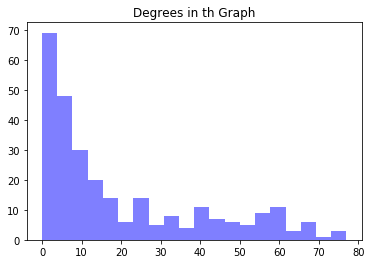

In [62]:
plt.hist(list(dict(G.degree()).values()), 20, facecolor='blue', alpha=0.5)
plt.title("Degrees in th Graph")

Let's compute **the average clustering coefficient** for the graph G.

The clustering coefficient for the graph is :

$$C = \frac{1}{n}\sum_{v \in G} c_v$$

where **n** - is the number of nodes in Graph G. 

And **$c_v$** - the local clustering coefficient of a vertex in a graph  (quantifies how close its neighbours are to being a clique (complete graph))

average clustering coefficient for the graph G :  0.5464356291836616


Text(0.5, 1.0, 'Clustering coefficients over the Graph')

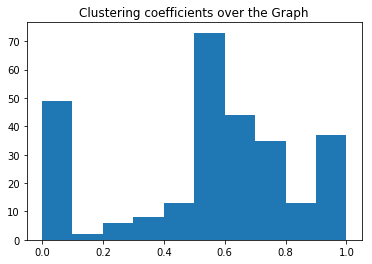

In [69]:
print("average clustering coefficient for the graph G : ", nx.average_clustering(G))
plt.hist(list(nx.clustering(G).values()))
plt.title("Clustering coefficients over the Graph")

Now it's time to find out what will be changed, if we deal with random generated graphs :

>> ### 2.2 Creation of a pseudo-random Graph
   



First thing we will do - creation of 100 random graphs with the same number of edges and vertices and look at the average clustering coefficient.

nx.gnm_random_graph():

Returns a  random graph. In the  model, a graph is chosen uniformly at random from the set of all graphs with  nodes and  edges.


The average over average clustering coefficients random graphs:  0.07102606178964932


Text(0.5, 1.0, 'Clustering coefficients over the last random Graph')

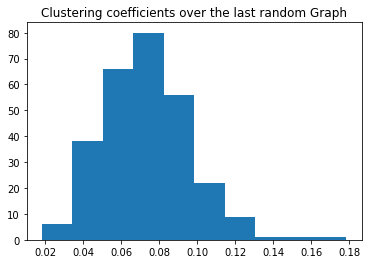

In [71]:
average_clust_coefs = []
for i in range(100): 
    GR = nx.gnm_random_graph(len(G.nodes()), len(G.edges))
    average_clust_coefs.append(nx.average_clustering(GR))
print("The average over average clustering coefficients random graphs: ", np.mean(average_clust_coefs))

plt.hist(list(nx.clustering(GR).values()))
plt.title("Clustering coefficients over the last random Graph")

As you can see, average clustering coefficient is around 10 times smaller than in our real graph, although the number of nodes and edges the same. 

>> ### 2.3 Graphs Visualization
     
The easiest way to draw our graph is to use nx.draw_kamada_kawai() :

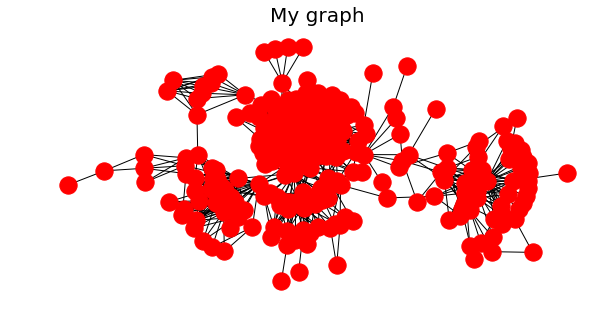

In [111]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
plt.title('My graph', fontsize = 20)
nx.draw_kamada_kawai(G)

It is a bit ugly, and without additional information is too simple, lazy and not interesting. 

So we will build our own function with good properties.

You can play with different parameters. XKCD gives some nice effects, but not necessary.

In [73]:
def plot_graph(g, coloring = [], palette = plt.cm.Set2):
    with plt.xkcd():
        k = nx.degree(g)
        plt.figure(1, figsize=(60,45))
        coord = nx.kamada_kawai_layout(g)
        labels={nd: g.node[nd]['name'] for (nd) in g.nodes()}
        if len(coloring)>0:
            nx.draw_networkx(g, pos=coord, nodelist=dict(k).keys(), node_size=[v*50 for v in dict(k).values()], 
                         font_size=17, node_color=coloring, labels=labels, cmap=palette)
        else:
            nx.draw_networkx(g, pos=coord, nodelist=dict(k).keys(), node_size=[v*50 for v in dict(k).values()], 
                         font_size=17, labels=labels)
            

CPU times: user 6.49 s, sys: 686 ms, total: 7.17 s
Wall time: 6.41 s


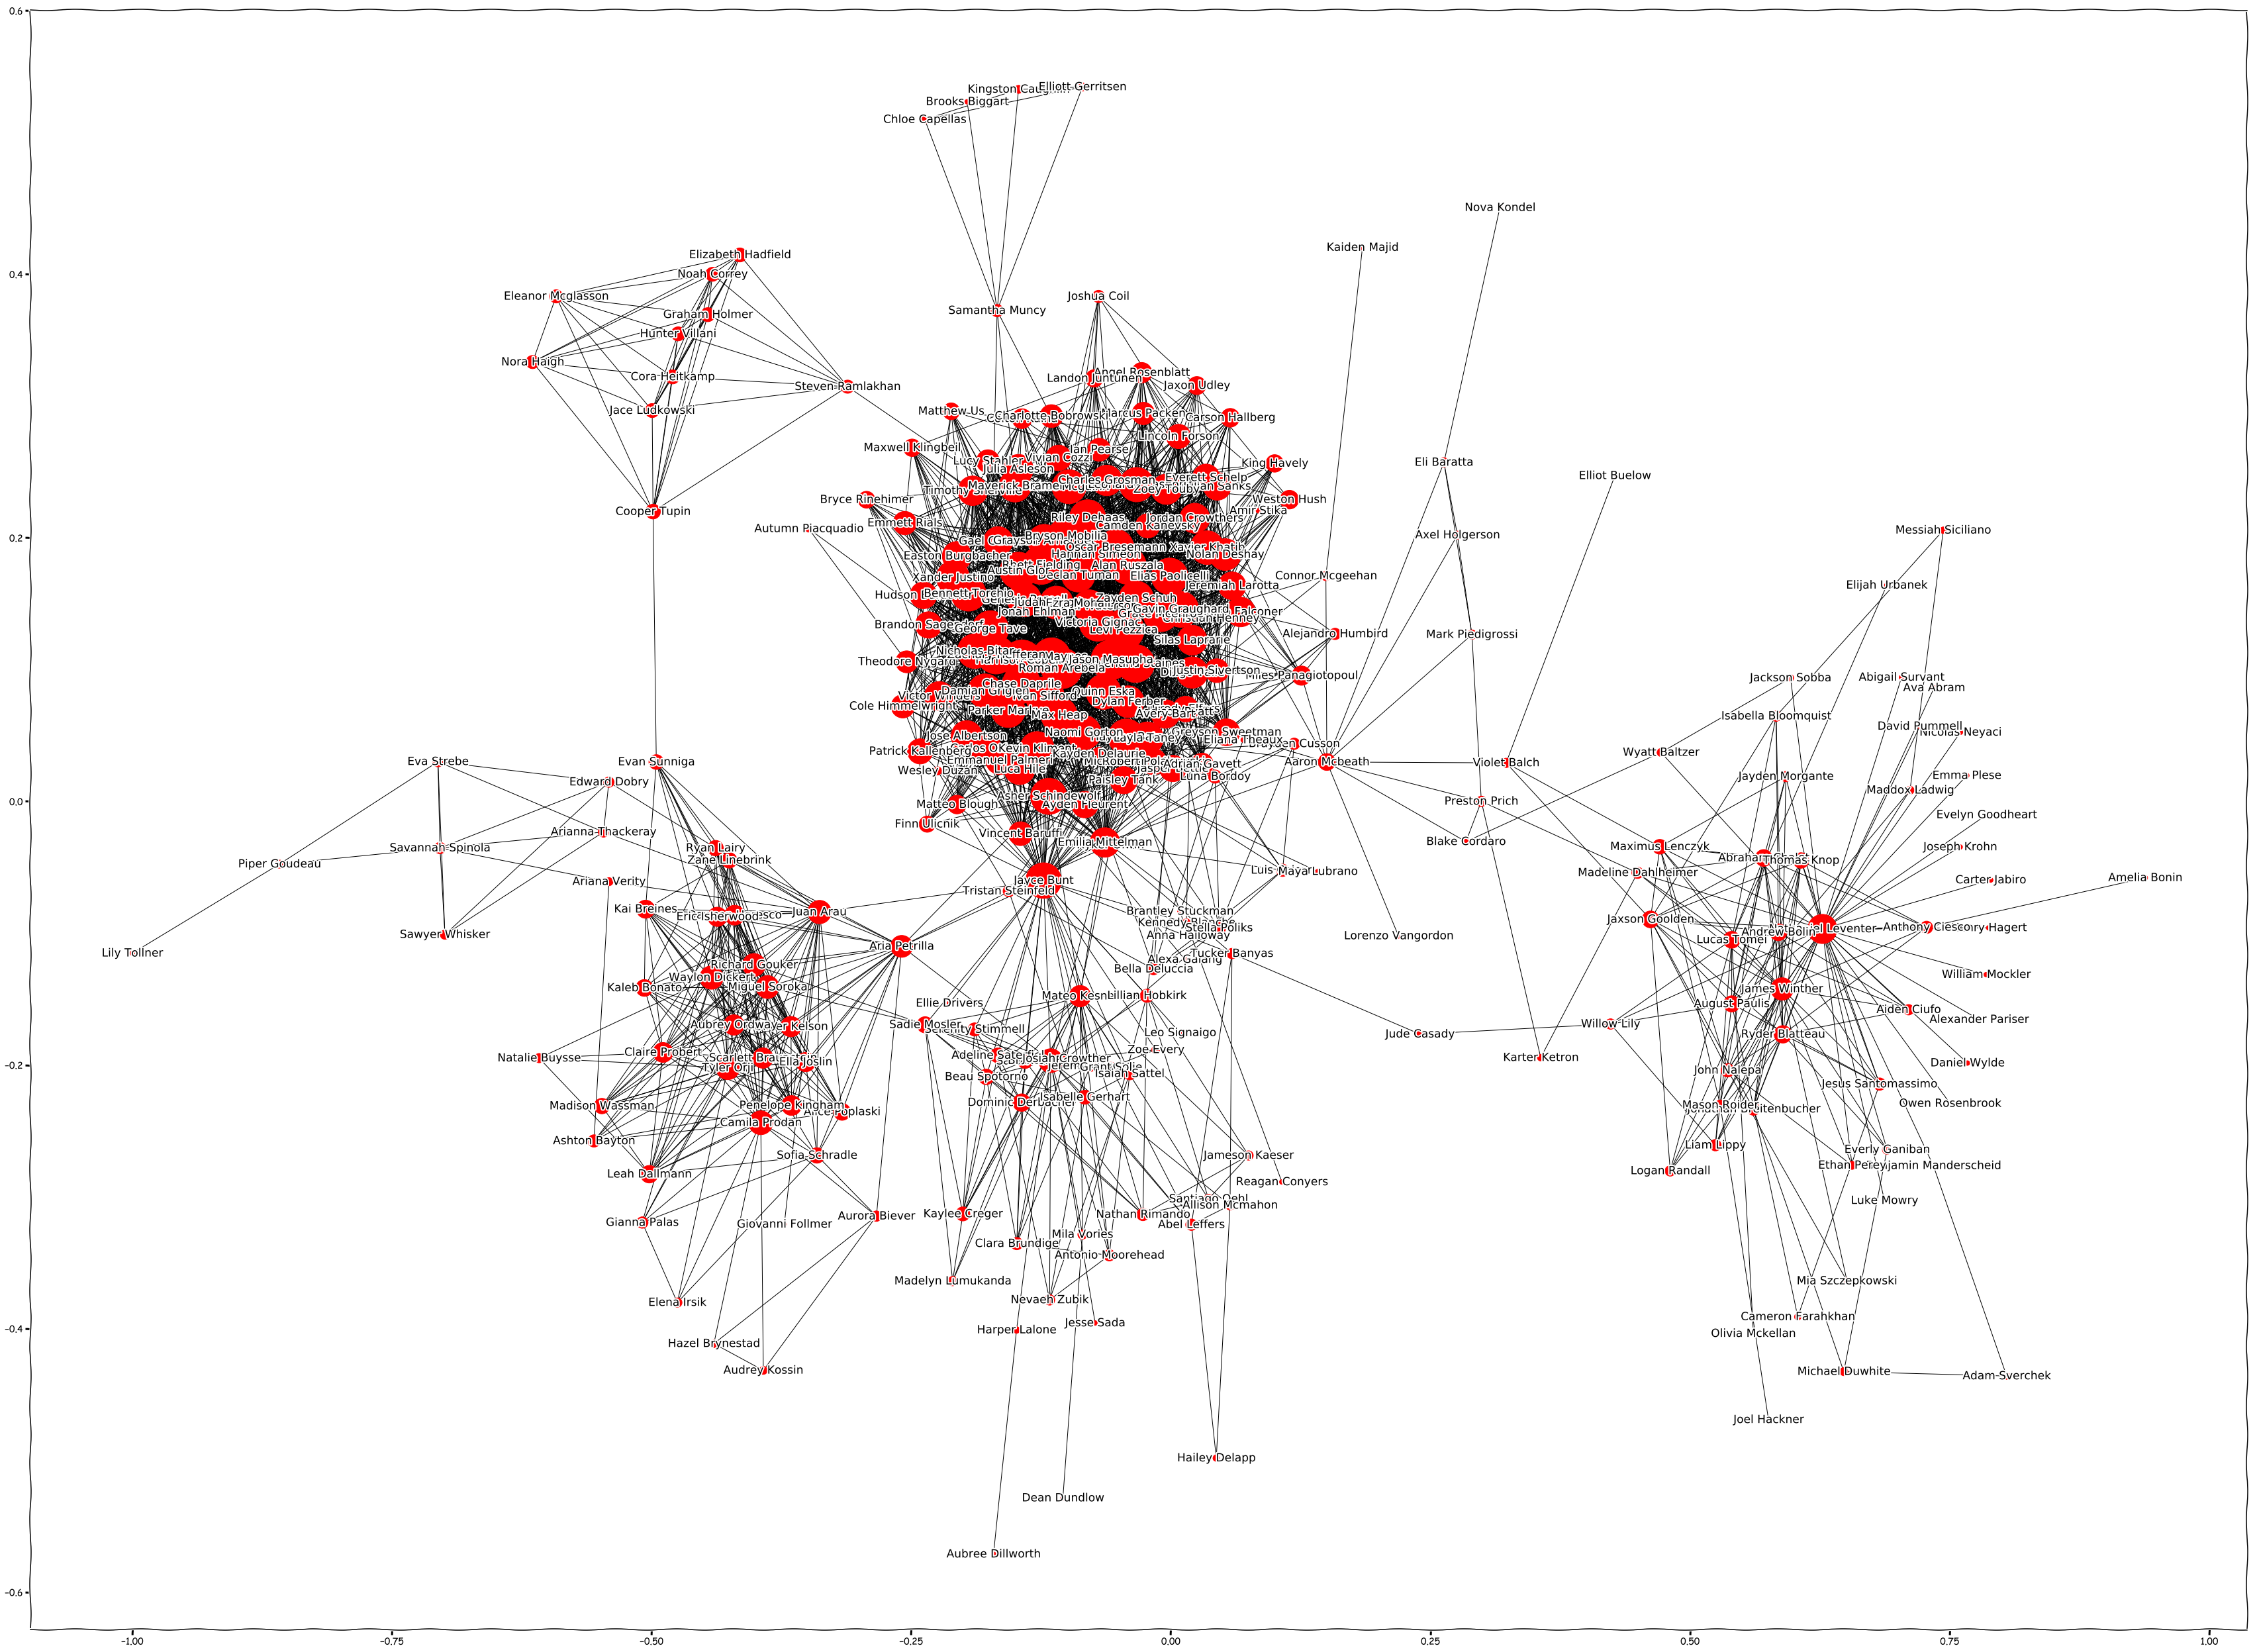

In [81]:
%%time 
plot_graph(G)

# saving picture if you need it:
#plt.savefig("../../img/my_detailed_graph.png")

> you will have to get something like this: 
<img src="https://habrastorage.org/webt/gi/g5/zt/gig5zthdxycrh4ezxbbf2k3q0s0.png" />

So it's much better.

Double click on it or just open in another window - you will be able to get familiar with all people and connections between them. 

But don't forget to look on random generated graph. Let's build it another way and visualize in small easy format.

We will swap edges using built-in function of NetwrokX

In [120]:
G_random = copy.deepcopy(G)
np.random.seed(17)
G_random = nx.algorithms.swap.double_edge_swap(G_random, nswap = 1000, max_tries=100000)


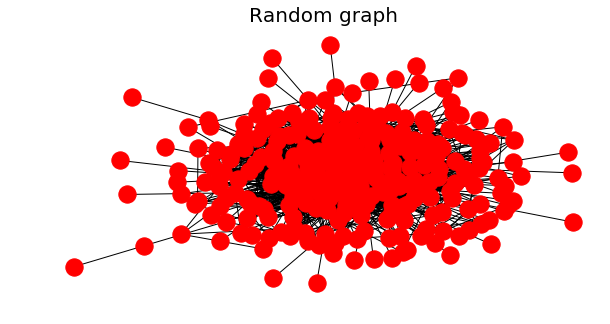

In [121]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
plt.title('Random graph', fontsize = 20)
nx.draw_kamada_kawai(G_random)

Pretty strange picture, isn't it? It's not similar to our real graph at all. As I already said, the number of nodes and edges the same as in the real graph, but the problem here is in clustering coefficients. 

We will use this graph on epidemic modeling too.

>>> ## 3. Introduction in Epidemics on Networks

>> ### 3.1 Basics of epidemic modeling 

    The epidemic model is intellectual source for information diffusion research. The first known mathematical model of epidemiology was formulated by Daniel Bernoulli (1760), when he studied the mortality rates in order to eradicate the smallpox. However, it was not until the early twentieth century, that deterministic modeling of epidemiology started. 
    
    Ross (1911) developed differential equation models of epidemics in 1911. Later, Kermack and McKendrick (1927) found the epidemic threshold and they argued that the density of susceptible must exceed a critical value to make the outbreak of an epidemic happen.


The mathematical models developed by epidemic research help clarify assumptions, variables, and parameters for diffusion research, lead to useful concepts (e.g., threshold, reproduction number), supply an experimental tool for testing theoretical conjectures, and forecast epidemic spreading in the future (Hethcote, 2009). Although epidemic models are simplifications of reality, they help us refine our understandings about the logic of diffusion beneath social realities (disease transmission, information diffusion through networks, and adoption of new technologies or behaviors). To understand the epidemic models in a better way, I will review **the basic epidemic models: SI, SIR, SIS**, and the applications in networks.

 However, despite the many advantages of deterministic models, it can be difficult to include realistic population networks, to incorporate realistic probability distributions for the time spent in the infectious period, and to assess the probability of an outbreak. Thus, the stochastic epidemic simulations, such as stochastic differential equations, Markov Chain Monte Carlo (MCMC), and agent based modeling, have been used to remedy the defect.

Giving definitions of models : 

>**SI model :**

A simple mathematical model of the spread of a disease in a population :

**S(t)** are those susceptible but not yet infected with the disease

**I(t)** is the number of infectious individuals

In this model a sustainable infection process is considered. Infected part of population has no chance to be healed... 

>
>**SIR model :**

The more realistic, then first one, mathematical model of the spread of a disease in a population.

Here the population of N individuals divides into three "compartments" which may vary as a function of time, t:

**S(t)** are those susceptible but not yet infected with the disease

**I(t)** is the number of infectious individuals

**R(t)** are those individuals who have recovered from the disease and now have immunity to it.

>
>**SIS model :**

Another extension of the SI model is the one that allows for reinfection:

**S(t)** are those susceptible but not yet infected with the disease

**I(t)** is the number of infectious individuals

**S(t)** infected individuals become susceptible after recovery.




Firstly, as we wanted to explore epidemic models, we have to be sure, that all nodes in our graph are connected to each other. And since it is, most probably, impossible to have all nodes connected in real graph, we will find the biggest **connected component**.

>> ### 3.2 Connected components

A connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which are connected to no additional vertices in the supergraph. For example, the graph shown in the illustration has three connected components. A vertex with no incident edges is itself a connected component. A graph that is itself connected has exactly one connected component, consisting of the whole graph.



In [115]:
# find the largest connected component:
largest_cc = max(nx.connected_components(G), key=len)

# take istead of our Graph this component: 
g = nx.Graph(G.subgraph(largest_cc))

Number of nodes are in the largest component of real graph:  261


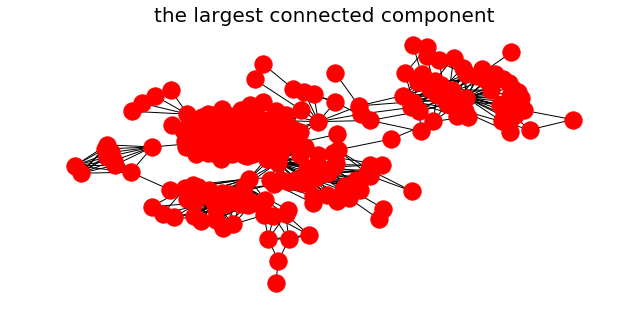

In [118]:
print("Number of nodes are in the largest component of real graph: ", len(g.nodes))
fig, ax = plt.subplots(1,1, figsize = (10,5))
plt.title('the largest connected component of real graph', fontsize = 20)
nx.draw_kamada_kawai(g)

Almost all nodes are here! In full graph I had 280 nodes, here : 261. Pretty large connected component!

Getting the same for random graph:

Number of nodes are in the largest component of random graph:  279


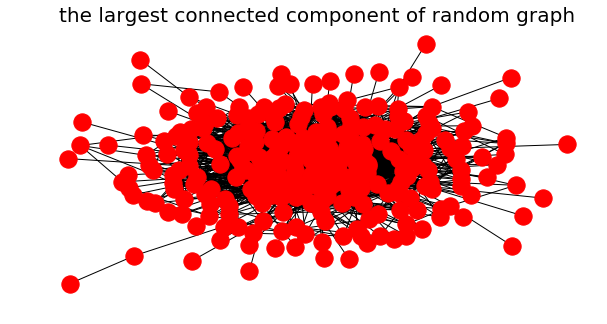

In [122]:
largest_cc = max(nx.connected_components(G_random), key=len)
g_random = nx.Graph(G_random.subgraph(largest_cc))

print("Number of nodes are in the largest component of random graph: ", len(g_random.nodes))
fig, ax = plt.subplots(1,1, figsize = (10,5))
plt.title('the largest connected component of random graph', fontsize = 20)
nx.draw_kamada_kawai(g_random)

Ok, 279 of 280 here. 

>>> ## 4. SI Model

>> ### 4.1 Statement of the model 
   
As I have mentioned, in this model infected part of population has no chance to be healed. 

Here are the equations:

\begin{equation}
   \begin{cases}
   \cfrac{ds(t)}{dt} = -\beta\,s(t)i(t)\\
   \cfrac{di(t)}{dt} = \beta\,s(t)i(t)
  \end{cases}
  \\
  i(t) + s(t) = 1
\end{equation}

To solve this differential equation, we can get the cumulative growth curve as a function of time:

$$I[t]= \frac{x_{0} e^{\beta t }}{1-x_{0}+ x_{0} e^{\beta t }}$$

Interestingly, this is a logistic growth featured by its S-shaped curve.
$x_{0}$ - is the initial value of I[t].

>

> **odeint()** from scipy will solve a system of ordinary differential equations for us.

For correct calling from documentation :

dy/dt = func(y, t, ...), where y can be a vector.

Parameters:
func : callable(y, t, args …) Computes the derivative of y at t.

y0 : array Initial condition on y (can be a vector).

t : array A sequence of time points for which to solve for y. The initial value point should be the first element of this sequence.

args : tuple, optional Extra arguments to pass to function.

> let's use it and look on results:

In [245]:
# spreading coefficient
beta = 0.3

# initial state 
# we will start from 0.01 infected :
i0 = 0.01
z0 = [1-i0, i0]

# time domain
t = np.arange(35)

# system of differential equations:
def si(z, t, beta):
    return np.array([
        -beta * z[1] * z[0],
         beta * z[1] * z[0]])

# solve: 
z = odeint(si, z0, t, (beta,))

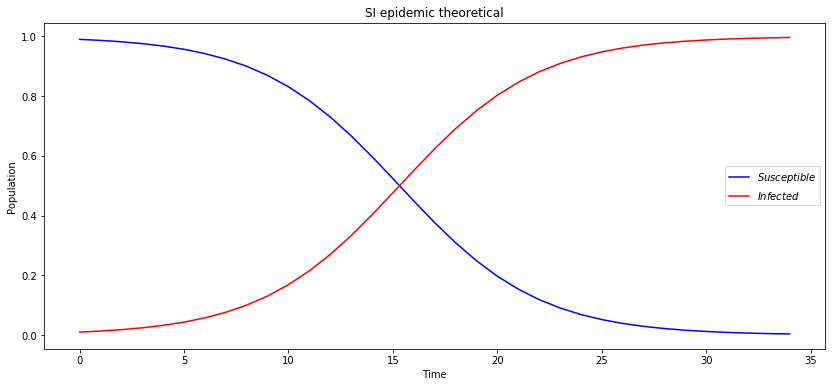

In [246]:
# Lets plot our solution

fig, ax = plt.subplots(1,1,figsize=(14,6))

plt.title("SI epidemic theoretical")
lines = ax.plot(z)
plt.setp(lines[0], color='blue')
plt.setp(lines[1], color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.legend(['$Susceptible$', '$Infected$'])

#ax[1].plot(z[:,1], z[:,0])
#ax[1].set_xlabel('$I$')
#ax[1].set_ylabel('$S$')

We see, that after t=30 almost all are infected. The curve grows exponentially shortly after the system is infected, and then saturates as the number of susceptible shrinks which makes it harder to find the next victims. Thus, it could be used to model the classic diffusion of innovations. 

> It's time to implement our own SI model for our Graphs. 

We are going to start with creating usefull function:


In [126]:
def get_infection_quant(G, beta, random_state):
    N = len(G.nodes)
    Nodes = list(G.nodes.keys())

    #dict for all people with values : 0 = ok, 1=ill
    infection_dict = dict(zip(Nodes, [0 for i in range(N)]))

    # initial infected random person:
    np.random.seed(random_state)
    i0 = Nodes[np.random.randint(0, N)]
    infection_dict[i0] = 1

    # array for infected people : 
    infected_nodes = []
    infected_nodes.append(i0)

    # array for (total quantity of infected)/N on each step :
    infection_quant = []
    infection_quant.append(len(infected_nodes)/N)

    # do while all people get infected : 
    while (infection_quant[-1] != 1):
        # take every infected person:
        for person in infected_nodes:
            # take every person's friend:
            for friend in nx.edges(G, person):
                # if friend not infected, with proba beta get infected
                if infection_dict[friend[1]] == 0:
                    infection_dict[friend[1]] = int(np.random.rand() < beta)
        # update list of infected people:
        infected_nodes = [indval2[1] for indval1, indval2 in
                          zip(enumerate(list(infection_dict.values())), 
                              enumerate(list(infection_dict.keys()))) if indval1[1] == 1]
        # update list of quantity of infected:
        infection_quant.append(len(infected_nodes)/N)

    return(infection_quant)


>> ### 4.2  Implementation in Real Graph

Since we created the function, let's use it with the same beta as in theoretical implementation:

In [127]:
%%time 
beta = 0.3
seed = 17
N_SIMULATIONS = 1000

SI_my_graph = []
for i in range(N_SIMULATIONS):
    SI_my_graph.append(get_infection_quant(G=g, beta=beta, random_state=seed * (i + 1)))
    

CPU times: user 1min 19s, sys: 32.4 ms, total: 1min 19s
Wall time: 1min 19s


In [128]:
# take average over simulations :
SI_my_graph_means = pd.DataFrame(SI_my_graph).mean(axis=0)

Text(0, 0.5, 'Average infection speed')

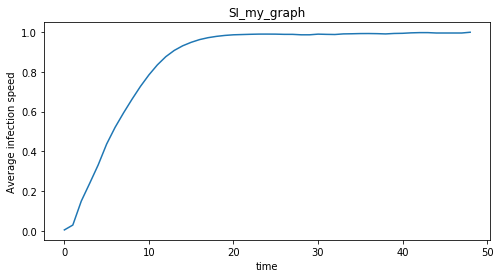

In [129]:
plt.subplots(1,1, figsize = (8, 4))
SI_my_graph_means.plot()
plt.title('SI_my_graph')
plt.xlabel('time')
plt.ylabel('Average infection speed')

>> ### 4.3 Implementation in  Random Graph

The same for random : 

In [130]:
%%time 
beta = 0.3
seed = 17
N_SIMULATIONS = 1000

SI_random_graph = []
for i in range(N_SIMULATIONS):
    SI_random_graph.append(get_infection_quant(G=g_random, beta=beta, random_state=seed * (i + 1)))
    

CPU times: user 1min 14s, sys: 69.1 ms, total: 1min 15s
Wall time: 1min 15s


Text(0, 0.5, 'Average infection speed')

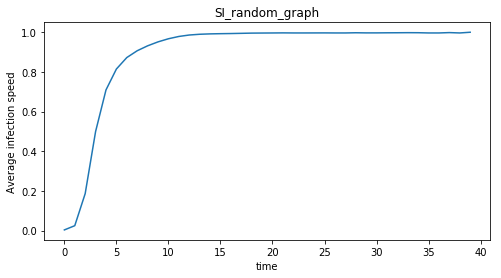

In [131]:
SI_random_graph_means = pd.DataFrame(SI_random_graph).mean(axis=0)

plt.subplots(1,1, figsize = (8, 4))
SI_random_graph_means.plot()
plt.title('SI_random_graph')
plt.xlabel('time')
plt.ylabel('Average infection speed')


As we can see, the growth of the random graph is faster, comparing with real.

And as expected the curves grow exponentially shortly after the system is infected. 

>> ### 4.4 Compare with EoN modeling

There is NO clean SI model in the library, but we may just as well take SIR model and set recovery rate as 0. 

Go for it and compare the results : 

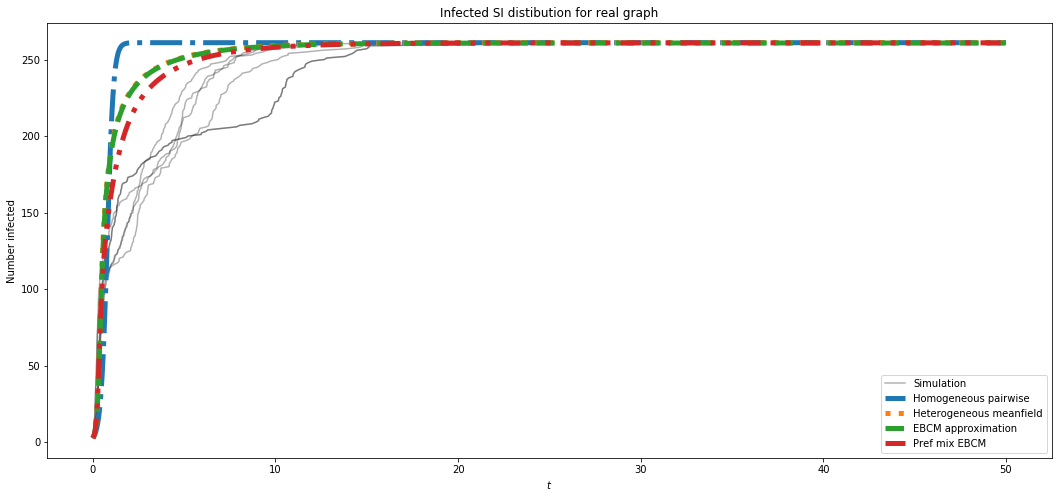

In [271]:
plt.subplots(1,1, figsize = (18, 8))

# take my real graph
G = g

# parameters
tmax = 50 #time ending
iterations = 5 #run N simulations
tau = 0.3 #transmission rate
gamma = 0.0 #recovery rate
rho = 0.01 #random fraction initially infected


# ODE (Ordinary differential equation) predictions: 
# run simulations
for counter in range(iterations): 
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)


# we expect a homogeneous model to perform poorly because the degree
# distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)


# meanfield models will generally overestimate SIR growth because they
# treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho,tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)


# The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)


# the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])


plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()

plt.title("Infected SI distibution for real graph")

# save pic if you need
#plt.savefig('../../img/SI_my_graph_EoN.png')

> you will have to get something like this: 
<img src="https://habrastorage.org/webt/a8/yo/op/a8yoopxadmfqqy8mzr37ispl24q.png" />

Nice! We got very similar results with different implementations of model. 

>In the naive model of SI, once one is infected, it is always infectious. However, this is not realistic for many situations of disease spreading. For many diseases, people recover after a certain time because their immune systems act to fight with the diseases. 

>There is usually a status of recovery denoted by R. Let γ denote the removal or recovery rate. Usually, researchers are more interested in its reciprocal (1/γ) which determines the average infectious period.

>>> ## 5. SIR Model

>> ### 5.1 Statement of the model

We already know something abour SIR, let's repeat : in the first stage, susceptible individuals become infected by the infectious ones with who they contact. Similar to the SI model, β is the transmission rate between individuals; In the second stage, infected individuals recover at the average rate γ. Given the premise that underlying epidemiological rates are constant, the differential equations of simple SIR model (with no births, deaths, or migrations) are:

\begin{equation}
   \begin{cases}
   \cfrac{ds_i(t)}{dt} = -\beta s_i(t)\sum\limits_j A_{ij} x_j(t)\\
   \cfrac{dx_i(t)}{dt} = \beta s_i(t)\sum\limits_j A_{ij} x_j(t) - \gamma x_i(t)\\
   \cfrac{dr_i(t)}{dt} = \gamma x_i(t)
  \end{cases}
  \\
  x_i(t) + s_i(t) + r_i(t) = 1
\end{equation}

> However, the differential equations above can not be analytically solved. In practice, researchers can evaluate SIR model numerically. We will do it.

Not so complex view of ODE (for calculating without graph) : 

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}



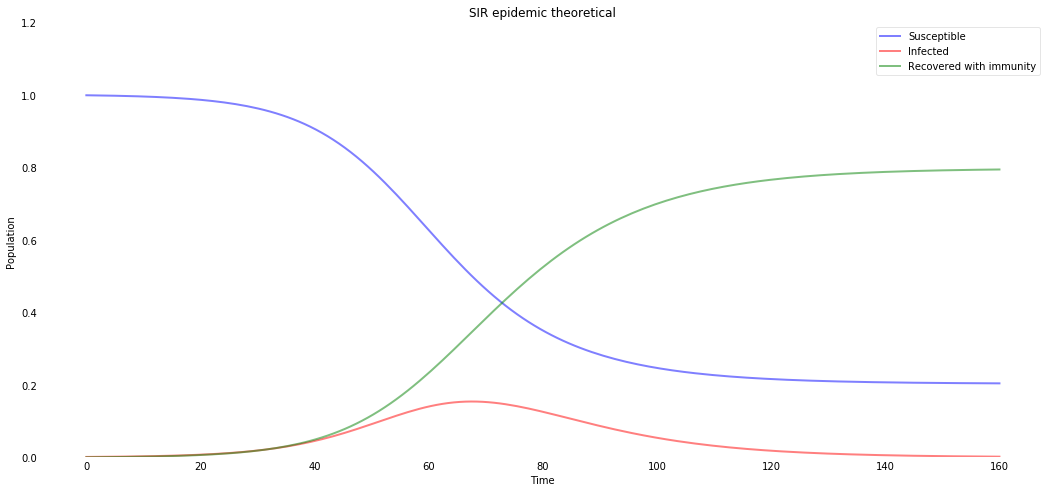

In [222]:
# Total population 
N = 1000

# Initial number of infected and recovered individuals, I0 and R0
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma
beta, gamma = 0.2, 1./10 
# A grid of time points
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def sir(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
sir_ = odeint(sir, y0, t, args=(N, beta, gamma))
S, I, R = sir_.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot('111',  axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time')
ax.set_ylabel('Population ')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.title("SIR epidemic theoretical")    
plt.show()




>> ### 5.2 Implementation in Real Graph


In [268]:
# take my real graph
n = len(g)
G = g

# Get adj. matrix
A = np.array(nx.adj_matrix(G).todense())

# Spreading\restoring coefficient
beta, gamma = 0.3, 0.2

# Time domain
t = np.arange(0, 15, 0.05)

# Initial state
idx = np.random.choice(range(n), 30)
i0 = np.zeros((n,))
i0[idx] = 1
z0 = np.concatenate((1-i0, i0, np.zeros((n,))))

# System of differential equations:
def sir(z, t, A, n, beta, gamma):
    return np.concatenate((
        -beta * z[0:n] * A.dot(z[n:2*n]),
         beta * z[0:n] * A.dot(z[n:2*n]) - gamma * z[n:2*n],
         gamma * z[n:2*n]
        ))
        

# solve
z = odeint(sir, z0, t, (A, n, beta, gamma))

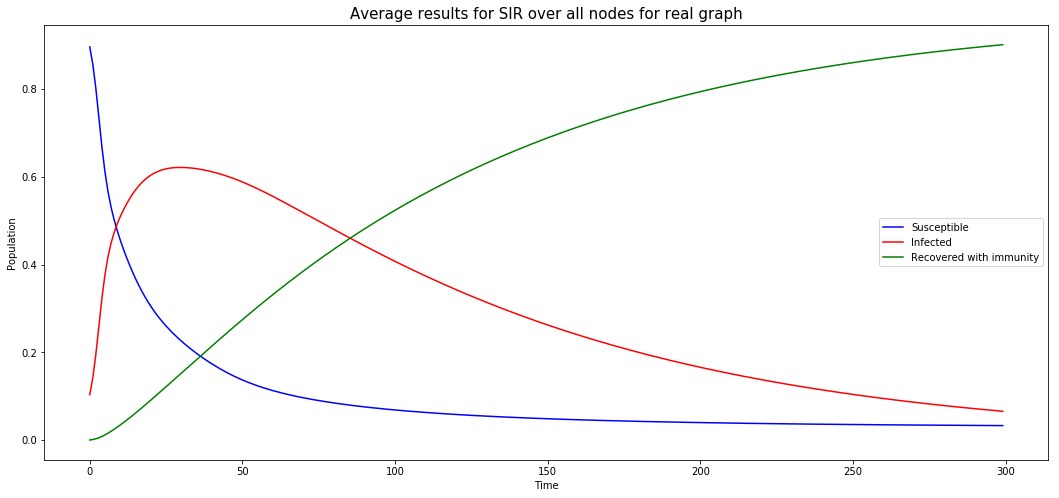

In [269]:
# Plot average over all nodes
s = z[:, 0:n].mean(axis=1)
x = z[:, n:2*n].mean(axis=1)
r = z[:, 2*n:3*n].mean(axis=1)

fig, ax = plt.subplots(1,1,figsize=(18, 8))
ax.plot(s,color = 'blue', label='Susceptible')
ax.plot(x,color = 'red', label='Infected')
ax.plot(r,color = 'green', label='Recovered with immunity')

ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('Average results for SIR over all nodes for real graph', fontsize = 15)

plt.legend()

We can see, that results seem to be similar to our theory implementation.

Now it's time for random graph.

>> ### 5.3 Implementation in  Random Graph

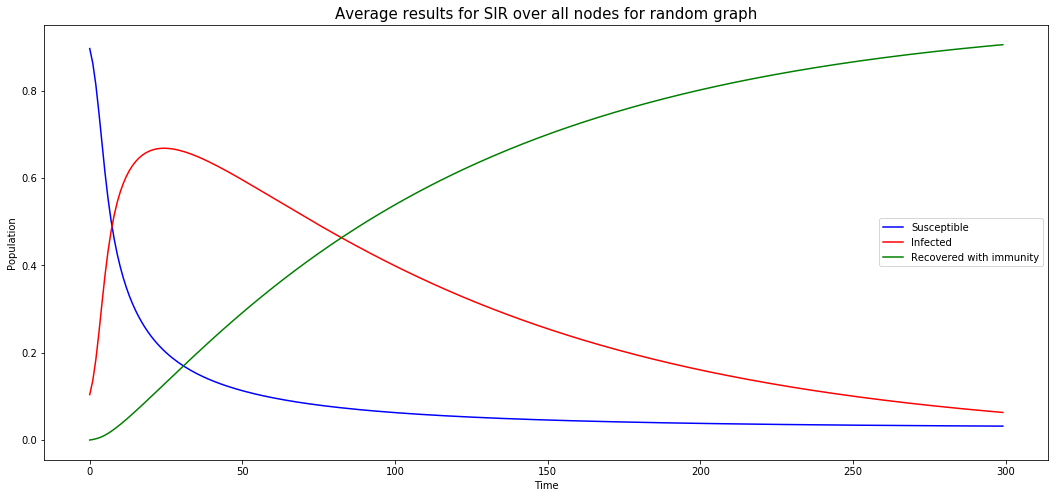

In [270]:
# take random graph
n = len(g_random)
G = g_random

# Get adj. matrix
A = np.array(nx.adj_matrix(G).todense())

# Spreading\restoring coefficient
beta, gamma = 0.3, 0.2

# Time domain
t = np.arange(0, 15, 0.05)

# Initial state
idx = np.random.choice(range(n), 30)
i0 = np.zeros((n,))
i0[idx] = 1
z0 = np.concatenate((1-i0, i0, np.zeros((n,))))

# solve
z = odeint(sir, z0, t, (A, n, beta, gamma))

# Plot average over all nodes
s = z[:, 0:n].mean(axis=1)
x = z[:, n:2*n].mean(axis=1)
r = z[:, 2*n:3*n].mean(axis=1)

fig, ax = plt.subplots(1,1,figsize=(18, 8))
ax.plot(s,color = 'blue', label='Susceptible')
ax.plot(x,color = 'red', label='Infected')
ax.plot(r,color = 'green', label='Recovered with immunity')

ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('Average results for SIR over all nodes for random graph', fontsize = 15)

plt.legend()

Here we can notice, that random graph : 

Infected curve has more smoother peak

Susceptible curve has more steeper descent.

>> ### 5.4 Compare with EoN modeling

Let's build only infected curve, it's pretty representative.

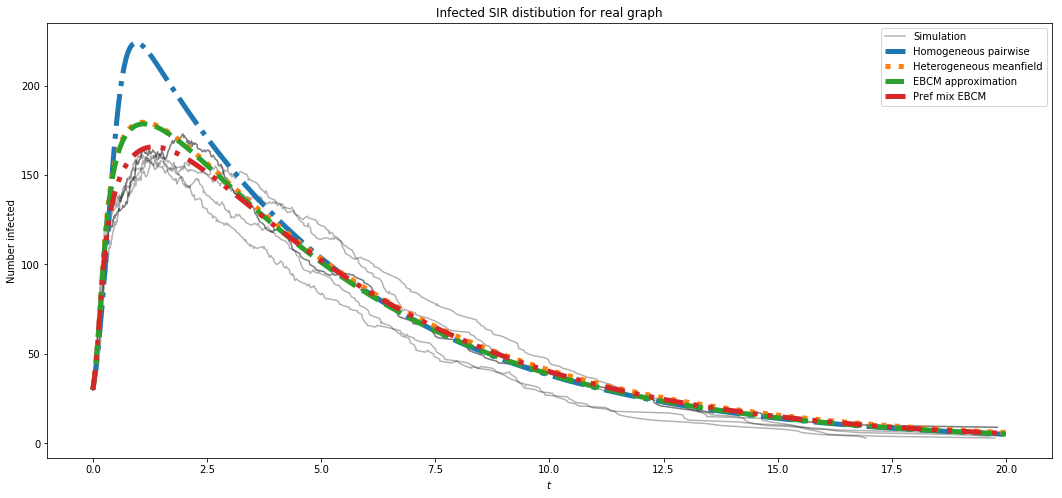

In [266]:
plt.subplots(1,1, figsize = (18, 8))

# take my real graph
G=g

# parameters
tmax = 20 #time ending
iterations = 5 #run N simulations
tau = 0.3 #transmission rate
gamma = 0.2 #recovery rate
# I'll take here as in my models : 
rho = 30/(len(g.nodes)) #random fraction initially infected


# ODE (Ordinary differential equation) predictions: 
# run simulations
for counter in range(iterations): 
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)


# we expect a homogeneous model to perform poorly because the degree
# distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)


# meanfield models will generally overestimate SIR growth because they
# treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho,tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)


# The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)


# the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])


plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()

plt.title("Infected SIR distibution for real graph")

# save pic if you need
# plt.savefig('../../img/SIR_my_graph_EoN.png')

> you will have to get something like this: 
<img src="https://habrastorage.org/webt/3l/4w/jl/3l4wjlbqqfcprmut1uaiawq4xh0.png" />

Comparing the results, we can state, that the results are close to each other, and our model is good enough for this purpose. 

Now we are going to continue the next model. 

>>> ## 6. SIS Model

>> ### 6.1 Statement of the model

As we remember, SIS model allows for reinfection. If infected individuals are not immune to the diseases after their recovery, they can be infected more than once.

There are only two states: susceptible and infected, and infected individuals become susceptible after recovery. The differential equations for the simple SIS epidemic model are: 

\begin{equation}
   \begin{cases}
   \cfrac{ds_i(t)}{dt} = -\beta s_i(t)\sum\limits_j A_{ij}x_j(t) + \gamma x_i(t)\\
   \cfrac{dx_i(t)}{dt} = \beta s_i(t)\sum\limits_j A_{ij}x_j(t) - \gamma x_i(t)
  \end{cases}
  \\
  x_i(t) + s_i(t) = 1
\end{equation}
where $x_i(t)$ and $s_i(t)$ are probabilities for a node $v_i$ to be infected or susceptable.



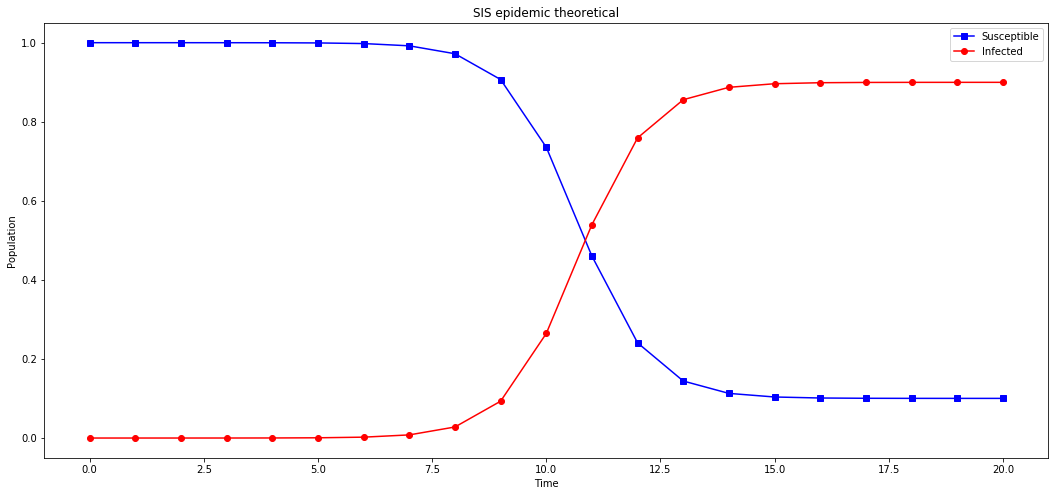

In [247]:
plt.subplots(1,1, figsize = (18, 8))

beta=1.4247
gamma=0.14286
I0=1e-6
INPUT = (1.0-I0, I0)
t_range = np.arange(0, 21, 1)

def sis(INP,t):
    Y=np.zeros((2))
    V = INP
    Y[0] = - beta * V[0] * V[1] + gamma * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    return Y   # For odeint


sis_ = odeint(sis,INPUT,t_range)

#Ploting
plt.plot(sis_[:,0], '-bs', label='Susceptible') 
plt.plot(sis_[:,1], '-ro', label='Infected')
plt.legend(loc=0)
plt.title('SIS epidemic theoretical')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()




>> ### 6.2 Implementation in Real Graph


In [263]:
# take my real graph
n = len(g)
G = g

# Get adj. matrix
A = np.array(nx.adjacency_matrix(G).todense())

# Spreading\restoring coefficient
beta, gamma = 0.3, 0.2

# Time domain
t = np.arange(0, 7, 0.05)

# Initial state
idx = np.random.choice(range(n), int(n*0.1))
i0 = np.zeros((n,))
i0[idx] = 1
# i0 = np.random.random_integers(0,1,[n,])
z0 = np.concatenate((1-i0,i0))

# System of differential equations..
def sis(z, t, A, n, beta, gamma):
    return np.concatenate((
        -beta * z[0:n] * A.dot(z[n:2*n]) + gamma * z[n:2*n],
         beta * z[0:n] * A.dot(z[n:2*n]) - gamma * z[n:2*n]))
        

# solve
z = odeint(sis, z0, t, (A, n, beta, gamma))

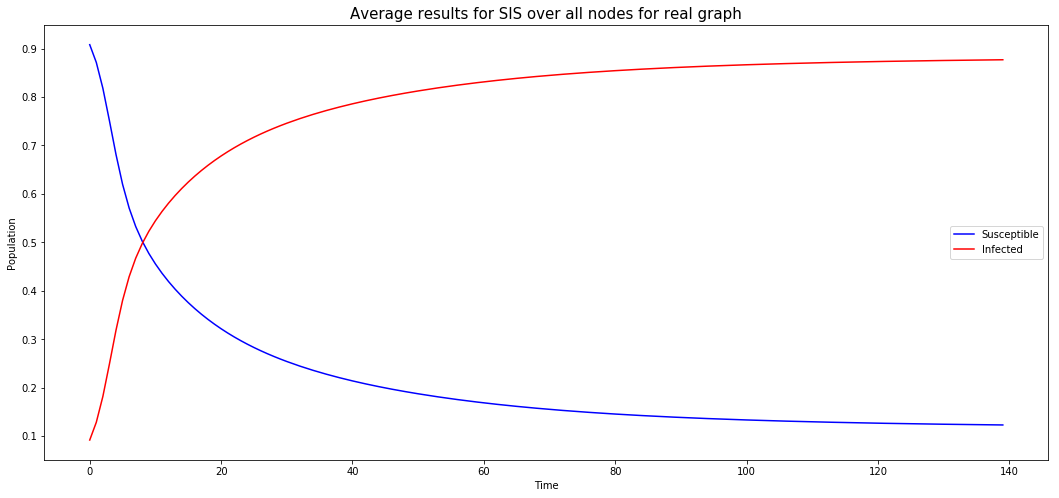

In [265]:
# Plot average over all nodes
s = z[:, 0:n].mean(axis=1)
x = z[:, n:2*n].mean(axis=1)

fig, ax = plt.subplots(1,1,figsize=(18, 8))
ax.plot(s,color = 'blue', label='Susceptible')
ax.plot(x,color = 'red', label='Infected')

ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('Average results for SIS over all nodes for real graph', fontsize = 15)

plt.legend()

Now it's time for random graph.

>> ### 6.3 Implementation in  Random Graph

In [272]:
# take random graph
n = len(g_random)
G = g_random

# Get adj. matrix
A = np.array(nx.adjacency_matrix(G).todense())

# Spreading\restoring coefficient
beta, gamma = 0.3, 0.2

# Time domain
t = np.arange(0, 7, 0.05)

# Initial state
idx = np.random.choice(range(n), int(n*0.1))
i0 = np.zeros((n,))
i0[idx] = 1
# i0 = np.random.random_integers(0,1,[n,])
z0 = np.concatenate((1-i0,i0))

# solve
z = odeint(sis, z0, t, (A, n, beta, gamma))

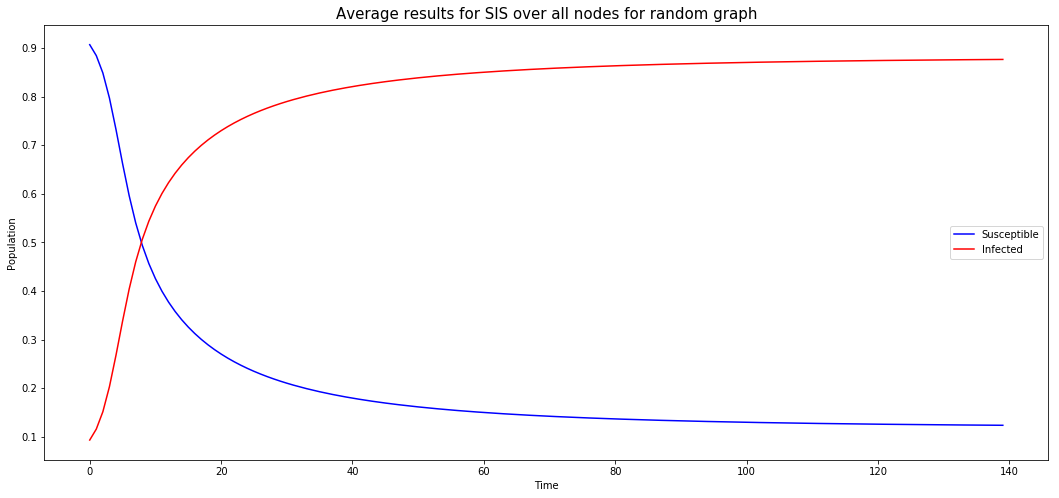

In [273]:
# Plot average over all nodes
s = z[:, 0:n].mean(axis=1)
x = z[:, n:2*n].mean(axis=1)

fig, ax = plt.subplots(1,1,figsize=(18, 8))
ax.plot(s,color = 'blue', label='Susceptible')
ax.plot(x,color = 'red', label='Infected')

ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('Average results for SIS over all nodes for random graph', fontsize = 15)

plt.legend()

Again similar results and again a bit sharper curves. 

Let's compare with EoN.


>> ### 6.4 Compare with EoN modeling

As in last case, let's build only infected curve.

Text(0.5, 1.0, 'Infected SIS distibution for real graph')

<Figure size 432x288 with 0 Axes>

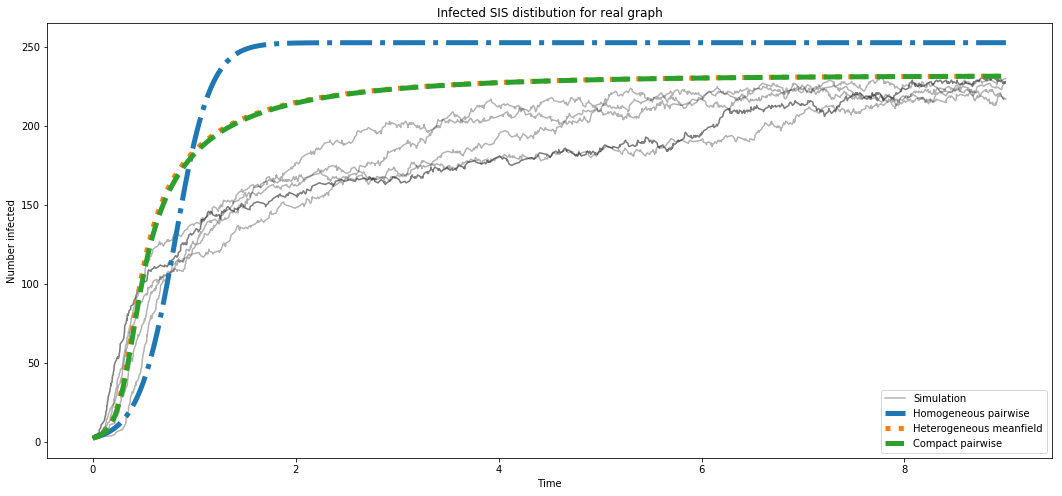

In [283]:
plt.clf()

plt.subplots(1,1, figsize = (18, 8))

# take my real graph
G = g 

# parameters
tmax = 9 #time ending
iterations = 5 #run N simulations
tau = 0.3 #transmission rate
gamma = 0.2 #recovery rate
rho = 0.01 #random fraction initially infected

for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)


#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho,tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)

plt.xlabel('Time')
plt.ylabel('Number infected')
plt.legend()
plt.title("Infected SIS distibution for real graph")

# save pic if you need
# plt.savefig('../../img/SIS_my_graph_EoN.png')

> you will have to get something like this: 
<img src="https://habrastorage.org/webt/l9/fi/du/l9fidu7odmmgi9eqqo0-tj_szi8.png" />

It's some error in accuracy of modeling here, but if we take, for example, 100 iterations and get average over them - the result will be more precise. You can try to set even more iterations, for sure, but avoid the dirtyness of the picture : there will be a lot of simulation lines, or you can just plot only average one.

So what about results? 

We got in this model values are close to expected theoretical whether it was our model or it was the EoN model.




>>> ## 7. Conclusion



That's all for today. I think, this information is enough for every newbie in networks.

What have we done while going through this tutorial?

> We have explored really different parts of working with Networks: 

`Firstly, we collected data:`
- That was not so easy, perhaps, if you are new with API, or maybe you skipped that part, if you are not VK user. But I think, it's worth reading anyway - you can pick up some usefull ideas for your future possible tasks and researches. 

`Secondly, we made some kind of preprocessing of data:`
- We changed all names and IDs of real people. For this mini-task we had to find and load third-party datasets, and than generate random people set and  map to our real data. 

`Thirdly, we met with cool library for network's analysis - NetworkX:`
- We got acquainted with how to get started with correct implementation of a graph in NetworkX: creation graph from scratch, random graphs, saving, loading, etc. 

- Although, we didn't go deep into classes and functions of this package (that wasn't purpose of this tutorial), we explored many methods, that you can use right away. Also, after this quick start of using this library you are able to improve skills by your own, just read the documentation, compile other tutorials - and it won't be challenging for you now. 

- We created a nice function for visualizing graphs, and discovered another easy way. You can always play around with parameters and other built-in functions from the package - visit documentation - and you will find much more interesting techniques. 

`Fourthly, that was amazing trial to Epidemics modeling!`
- We got a bit closer to be familiar with good library EoN: as with NetworkX, we didn't dig everything around this package, but we used if for all ideas that we needed in this tutorial! And for sure, don't be afraid of experimentation - here is a large place for self-improvment in every direction you can think. 

- We made research about 3 main models, but we did it from theoretical side, for real graph and for random one! We expanded the place for future analysis here - we got many useful instruments, and you can find even more if you are got interested in this theme! I hope so. 

`N-thly, some recommendations:`
- To get deeper into EoN visit official page : https://media.readthedocs.org/pdf/epidemicsonnetworks/latest/epidemicsonnetworks.pdf
- As you remember, we worked with real graph loaded from social network. I really encourage you to load your own social net and find something good, for beginning: dependencies and clusters. For sure it will be much more interesting, if you load graph of depth not only 2, but 3, 4...(super complex). And since you'll have to load friends - you'll also have to make requests to API - so I recommend you to get familiar with this sphere, if you are not yet.

- And talking about social nets, it's totally worth reading for the start: Granovetter's paper "The Strength of Weak Ties"